In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
pd.set_option('display.max_rows', 100)

<Figure size 720x720 with 0 Axes>

In [2]:
titanic_data = pd.read_csv('./titanic/train.csv', index_col='PassengerId')
titanic_test = pd.read_csv('./titanic/test.csv', index_col='PassengerId')
titanic_Ytest = pd.read_csv('./titanic/gender_submission.csv', index_col='PassengerId')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_test['Survived'] = 2
titanic = pd.concat([titanic_data, titanic_test])
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,2,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,2,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,2,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


0    549
1    342
2    418
Name: Survived, dtype: int64

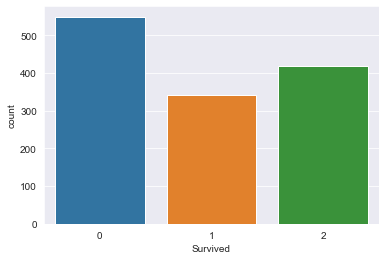

In [7]:
sns.countplot(data=titanic, x='Survived')
titanic.Survived.value_counts().sort_index()

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [9]:
titanic_na = (titanic.isna().sum()).to_frame(name='Train_na')
titanic_na

,Train_na
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


Text(0.5, 1.0, 'count missing values')

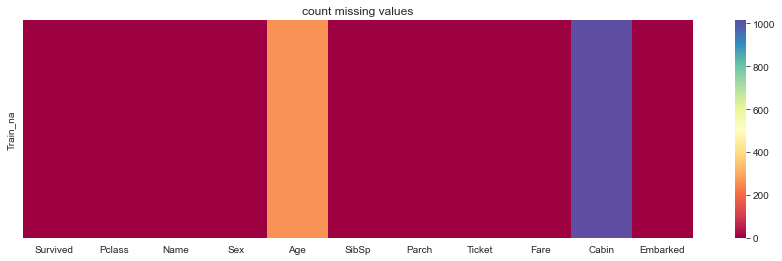

In [12]:
plt.figure(figsize=(15, 4))
sns.heatmap(data=titanic_na.T, cmap='Spectral').set_title('count missing values')

In [17]:
titanic.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
NaCount        0
dtype: int64

In [19]:
titanic['NaCount'] = titanic.T.isna().sum()
titanic[['Survived', 'NaCount']]

,Survived,NaCount
PassengerId,,
1,0,1
2,1,0
3,1,1
4,1,0
5,0,1
...,...,...
1305,2,2
1306,2,0
1307,2,1


In [24]:
titanic.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [25]:
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace=True)
titanic.drop(columns='Cabin', axis=1, inplace=True)
titanic.Embarked = titanic['Embarked'].astype('category')

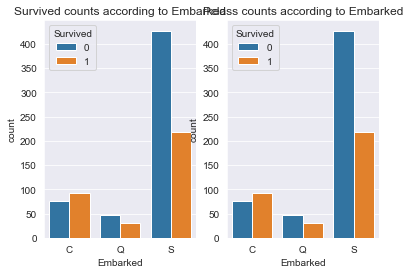

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.countplot(data=titanic[titanic.Survived!=2], x='Embarked', hue='Survived', ax=ax[0]).set_title('Survived counts according to Embarked')
sns.countplot(data=titanic[titanic.Survived!=2], x='Embarked', hue='Survived', ax=ax[1]).set_title('Pclass counts according to Embarked')
plt.show()

In [37]:
titanic['Prefix'] = titanic.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
titles = titanic.Prefix.value_counts().to_frame()
titles.reset_index()

,index,Prefix
0,Mr,757
1,Miss,260
2,Mrs,197
3,Master,61
4,Rev,8
5,Dr,8
6,Col,4
7,Mlle,2
8,Major,2
9,Ms,2
